<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tratamiento-de-valores-nulos" data-toc-modified-id="Tratamiento-de-valores-nulos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tratamiento de valores nulos</a></span></li><li><span><a href="#Eliminacion-de-filas-o-columnas-con-valores-nulos" data-toc-modified-id="Eliminacion-de-filas-o-columnas-con-valores-nulos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Eliminacion de filas o columnas con valores nulos</a></span></li><li><span><a href="#Imputar-los-valores-perdidos-para-la-variable-continua" data-toc-modified-id="Imputar-los-valores-perdidos-para-la-variable-continua-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imputar los valores perdidos para la <code>variable continua</code></a></span><ul class="toc-item"><li><span><a href="#fillna()" data-toc-modified-id="fillna()-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><code>fillna()</code></a></span></li><li><span><a href="#replace()" data-toc-modified-id="replace()-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>replace()</a></span></li></ul></li><li><span><a href="#Imputar-los-valores-perdidos-de-una-variable-categórica" data-toc-modified-id="Imputar-los-valores-perdidos-de-una-variable-categórica-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Imputar los valores perdidos de una <code>variable categórica</code></a></span><ul class="toc-item"><li><span><a href="#Otros-métodos-de-imputación" data-toc-modified-id="Otros-métodos-de-imputación-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Otros métodos de imputación</a></span><ul class="toc-item"><li><span><a href="#Simple-Imputer" data-toc-modified-id="Simple-Imputer-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Simple-Imputer</a></span></li><li><span><a href="#Iterative-Imputer" data-toc-modified-id="Iterative-Imputer-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Iterative-Imputer</a></span></li><li><span><a href="#KNN-Imputer." data-toc-modified-id="KNN-Imputer.-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>KNN-Imputer.</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sidetable

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv("insurance.csv", index_col = 0)
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.90,0,yes,southwest,16884.9240
1,18.0,male,33.77,1,no,southeast,1725.5523


# Tratamiento de valores nulos

El proceso de rellenar los datos que faltan con un determinado método estadístico se conoce como **imputación** y tiene una gran variedad de opciones. 

Las principales formas que tenemos para hacer son: 

- Eliminación de filas con valores perdidos


- Imputar los valores perdidos para la variable continua


- Imputar los valores perdidos de una variable categórica


- Otros métodos de imputación

In [3]:
# como en este jupyter vamos a trabajar con nulos, lo primero que vamos a hacer es calcular el porcentaje de nulos 
## que tenemos en nuestro dataframe

df.stb.missing()

,missing,total,percent
age,134,1338,10.014948
sex,134,1338,10.014948
smoker,27,1338,2.017937
bmi,13,1338,0.971599
charges,3,1338,0.224215
children,0,1338,0.000000
region,0,1338,0.000000


# Eliminacion de filas o columnas con valores nulos 

Los valores nulos se pueden manejar eliminando las filas o columnas que tienen valores nulos. 

- Si las **columnas** tienen más de la mitad de las filas como nulos, se puede eliminar toda la columna. 


- En el caso de las **filas**, si tenemos alguna fila con todo nulos la deberíamos eliminar, también la podremos eliminar si tenemos nulos en al menos el 70% de las columnas.

Este forma de eliminar nulos tiene los siguientes pros y contras: 

|Pros   |   Contras|  
|---|---|
| Un modelo entrenado con la eliminación de todos los valores perdidos crea un modelo robusto. |  Pérdida de mucha información. |  
|   | Funciona mal si el porcentaje de valores perdidos es excesivo en comparación con el conjunto de datos completo. | 


In [4]:
# en este caso haremos un dropna de todo el dataframe donde al menos haya un nulo

df_sin_nulos = df.dropna(how = "any")

In [5]:
# chequeemos si seguimos teniendo valores nulos

df_sin_nulos.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Sin embargo, también podemos eliminar los nulos en función de una columna. En nuestro *dataset* tiene poco sentido tiene tener filas sin el valor de la columna de `charges`, por lo que podríamos eliminar las filas donde tengamos nulos en esta columna.  

In [6]:
df.dropna(subset= ["charges"], how = "any", inplace = True)


In [7]:
# Perfecto! hemos consegido eliminar los nulos de la columna "name"
df.isnull().sum()

age         134
sex         134
bmi          13
children      0
smoker       27
region        0
charges       0
dtype: int64

# Imputar los valores perdidos para la `variable continua`

Las columnas del *dataframe* que tienen valores numéricos continuos pueden sustituirse por la media, la mediana o la moda de los valores restantes de la columna. Este método puede evitar la pérdida de datos en comparación con el método anterior. 


|Pros   |   Contras|  
|---|---|
| Evita la pérdida de datos que supone la eliminación de filas o columnas|Sólo funciona con variables numéricas continuas. |
| Funciona bien con un pequeño conjunto de datos y es fácil de implementar.  |  Puede ocasionar pérdida de datos| 
 

Esto lo podremos hacer de dos formas: 

- Usando el método `fillna` 


- Usando el método `replace`

📌 Nos podemos preguntar 🤔 en que basamos nuestra decisión para reemplazar los valores nulos por la media, la mediana.

Si bien es cierto que no hay una fórmula mágica para esto, podriamos decir que: 

- Si nuestros datos están mas o menos agrupados y no presentan una gran desviación podríamos usar la media



- Si nuestros presentan una desviación muy grande, en ese caso lo normal sera usar la mediana. 


In [8]:
# resumen variables numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1201.0,39.166528,14.059359,18.0000,26.0000,39.0000,51.00000,64.00000
bmi,1322.0,30.655624,6.103079,15.9600,26.2200,30.3800,34.60000,53.13000
children,1335.0,1.095880,1.206469,0.0000,0.0000,1.0000,2.00000,5.00000
charges,1335.0,13284.596157,12118.765654,1121.8739,4742.3061,9386.1613,16717.01075,63770.42801


In [9]:
# resumen variables categóricas

df.describe(include = "object").T

,count,unique,top,freq
sex,1201,2,male,611
smoker,1308,2,no,1039
region,1335,4,southeast,363


## `fillna()`


In [10]:
# lo haremos con la media. ¿Por qué? Por que cuando hicimos el describe los valores de media y mediana eran muy similares

df['age'].fillna(df['age'].mean ,inplace = True)

In [11]:
# chequeamos si tenemos valores nulos en la columna de edad

df.isnull().sum()

age           0
sex         134
bmi          13
children      0
smoker       27
region        0
charges       0
dtype: int64

## replace()

In [12]:
# en este caso trabajarems con las columnas de "positive_rattings" y "negative_rattings"

df["bmi"].replace(np.nan, df["bmi"].median(), inplace = True)

In [13]:
# Perfecto! Ya no tenemos nulos en estas columnas!!!

df.isnull().sum()

age           0
sex         134
bmi           0
children      0
smoker       27
region        0
charges       0
dtype: int64

# Imputar los valores perdidos de una `variable categórica`

Cuando los valores que faltan provienen de columnas categóricas, los valores que faltan pueden ser sustituidos por la categoría más frecuente. 

Además, si el número de valores que faltan es muy grande, puede sustituirse por una nueva categoría.

|Pros   |   Contras|  
|---|---|
|Evita la pérdida de datos que supone la eliminación de filas o columnas |Sólo funciona con variables categóricas.|
|Funciona bien con un pequeño conjunto de datos y es fácil de implementar.  |  Se añaden nuevas categorías a nuestro datos, las cuales no derivan directamente de nuestros datos. |
|Evita la pérdida de datos al añadir una categoría única||

En este caso podríamos hacer dos cosas: 

- Crear una nueva categoría dentro de nuestros datos, por ejemplo una que fuera "desconocido" 


- Reemplazar con el valor que más se repite dentro de la columna. 

 Usaremos el método `replace`

In [14]:
df["sex"].replace(np.nan, "desconocido", inplace = True)


In [15]:
# ¿Qué ha pasado con los nulos de estas columnas? Ya nos los tenemos! 

df.isnull().sum()

age          0
sex          0
bmi          0
children     0
smoker      27
region       0
charges      0
dtype: int64

In [16]:
df["sex"].unique()

array(['female', 'male', 'desconocido'], dtype=object)

In [17]:
# sacamos la moda de la columnna de interés
df.smoker.mode()[0]

'no'

In [18]:
df["smoker"].replace(np.nan, df.smoker.mode()[0], inplace = True)

In [19]:
# chequeamos los valores nulos:

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

También lo podríamos hacer con un `fillna` 

```python
df['smoker'].fillna(df['smoker'].mode()[0], inplace = True)
```

## Otros métodos de imputación

En Python tenemos la librería `sklearn` que nos proporciona una serie de herramientas para em manejo de los valores nulos. 

Algunos de los métodos que nos podemos encontrar son: 

- Simple-Imputer


- Interative


- KNN-Imputer 


Lo primero que tendremos que hacer es instalar `sklearn`

```
pip install sklearn
```

Ya no tenemos ningún nulo porque los hemos eliminado, lo que haremos será volver a cargar el *dataset* y aplicaremos los métodos de `sklearn`

In [20]:
df2 = pd.read_csv("insurance.csv", index_col = 0)
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,NaN,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,NaN,male,28.880,0,no,northwest,3866.85520


### Simple-Imputer 

Nos permite transformar los valores nulos de nuestras columnas. SimpleImputer proporciona estrategias básicas para la imputación de valores nulos. Los valores perdidos se pueden imputar con un valor constante proporcionado, o utilizando los estadísticos (media, mediana o más frecuente) de cada columna en la que se encuentran los valores perdidos. 



Su sintaxis es: 

```python
SimpleImputer(*, missing_values=nan, strategy='mean',  verbose=0, copy=True)
```


> Tenemos que tener en cuenta que tanto las funciones fit() como transform() esperan un array 2D, así que nos tenemos que asegurar de pasar un array o dataframe 2D. Si pasas un array 1D o una Serie Pandas, tendremos un error.

Lo primero que tenemos que hacer es iniciar el método, donde especificaremos porque queremos reemplazar los nulos. Dejo el parámetro `copy` por defecto, es decir, en True para que nos aplique los cambios en la misma columna. 

In [21]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)

Una vez creada la instancia, se utiliza la función `fit()` para ajustar el imputer en la(s) columna(s) sobre las que se quiere trabajar, en nuestro caso lo haemos solo sobre la columna `price`

In [22]:
imputer = imputer.fit(df2[['age']])

Ahora podemos utilizar la función `transform()` para rellenar los valores que faltan basándose en la estrategia que especificamos en el inicializador de la clase SimpleImputer. 

In [23]:
df2['age'] = imputer.transform(df2[['age']])

In [24]:
# si chequeamos ahora los valores nulos veremos que ya no tenemos en la columna `age` 

df2.isnull().sum()

age           0
sex         134
bmi          13
children      0
smoker       27
region        0
charges       3
dtype: int64

**NOTA** Si quisieramos aplicar el método a varias columnas tendríamos que seguir la siguiente sintaxis: 

```python
df[['col1','col2']] = imputer.transform(df[['col1','col2']])
```

Este método puede tener muchas variaciones, en [este](https://towardsdatascience.com/imputing-missing-values-using-the-simpleimputer-class-in-sklearn-99706afaff46) artículo tenéis más casos donde podríamos aplicar este método. 

###  Iterative-Imputer

Un enfoque más sofisticado es utilizar la clase IterativeImputer, que modela cada característica con valores perdidos como una función de otras características, y utiliza esa estimación para la imputación. Lo hace de forma iterada: en cada paso, una columna de características se designa como salida y y las otras columnas de características se tratan como entradas X. Se devuelven los resultados de la última ronda de imputación.


El IterativeImputer utiliza los datos disponibles en otras columnas con el fin de estimar los valores nulos que se imputan o queremos quitar. 

La sintaxis en este caso sería: 
```python
IterativeImputer(estimator=None, missing_values=nan,  max_iter=10, tol=0.001, n_nearest_features=None, initial_strategy=mean, imputation_order=ascending, verbose=0, random_state=None)
```

Necesitaremos importar: 

```python

# NOTA: Este estimador es todavía experimental por ahora. Para utilizarlo, es necesario importar explícitamente enable_iterative_impute
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
```

**NOTA**: este método solo lo podemos usar con variables numéricas. 

Lo primero que vamos a hacer es sacar las variables numéricas usando el método `select_dtypes` para luego chequear cuales de ellas tienen valores nulos. 

In [25]:
numericas = df2.select_dtypes(include = np.number)

In [26]:
numericas.isnull().sum()

age          0
bmi         13
children     0
charges      3
dtype: int64

In [27]:
# creamos una instancia del método Iterative Imputer con las características que queremos 
imputer = IterativeImputer(n_nearest_features=None, imputation_order='ascending')

In [28]:
# lo aplicamos sobre nuestras variables numéricas. 

imputer.fit(numericas)

IterativeImputer()

In [29]:
# transformamos nuestros datos, para que se reemplacen los valores nulos usando "transform". 
## ⚠️ Esto nos va a devolver un array!

imputer.transform(numericas)

array([[1.90000000e+01, 2.79000000e+01, 0.00000000e+00, 1.68849240e+04],
       [1.80000000e+01, 3.37700000e+01, 1.00000000e+00, 1.72555230e+03],
       [2.80000000e+01, 3.30000000e+01, 3.00000000e+00, 4.44946200e+03],
       ...,
       [1.80000000e+01, 3.68500000e+01, 0.00000000e+00, 1.62983350e+03],
       [2.10000000e+01, 2.58000000e+01, 0.00000000e+00, 2.00794500e+03],
       [6.10000000e+01, 2.90700000e+01, 0.00000000e+00, 2.91413603e+04]])

In [30]:
# convertimos el array que nos devuelve en un dataframe

numericas_trans = pd.DataFrame(imputer.transform(numericas), columns = numericas.columns)

In [31]:
numericas_trans.head()

,age,bmi,children,charges
0,19.000000,27.900,0.0,16884.92400
1,18.000000,33.770,1.0,1725.55230
2,28.000000,33.000,3.0,4449.46200
3,33.000000,22.705,0.0,21984.47061
4,39.171927,28.880,0.0,3866.85520


In [32]:
# perfecto, ya no tenemos ningún nulo! 

numericas_trans.isnull().sum()

age         0
bmi         0
children    0
charges     0
dtype: int64

Ahora es momento de juntar el nuevo dataframe (numericas_trans) sin valores nulos con nuestro dataframe que todavía tiene nulos

In [33]:
# lo primero que hacemos es sacar el nombre de las columnas del dataframe sin nulos

columnas = numericas_trans.columns

In [34]:
# utilizando "columnas" eliminamos esas columnas de nuestro dataframe

df2.drop(columnas, axis = 1, inplace = True)

In [35]:
# creamos nuevas columnas en nuestro dataframe original basándonos en el dataframe de las numericas_trans

df2[columnas] = numericas_trans[columnas]

In [36]:
# chequeamos los nulos. Perfecto! Ya no tenemos ninguno. 

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### KNN-Imputer.  


>**Solo lo podremos usar para variables numericas o de formato fecha.** 

Entendamos un poco que esto del KNN antes de seguir. 

Imaginemos que tenemos una variable con dos categorías representadas como vemos aquí: 

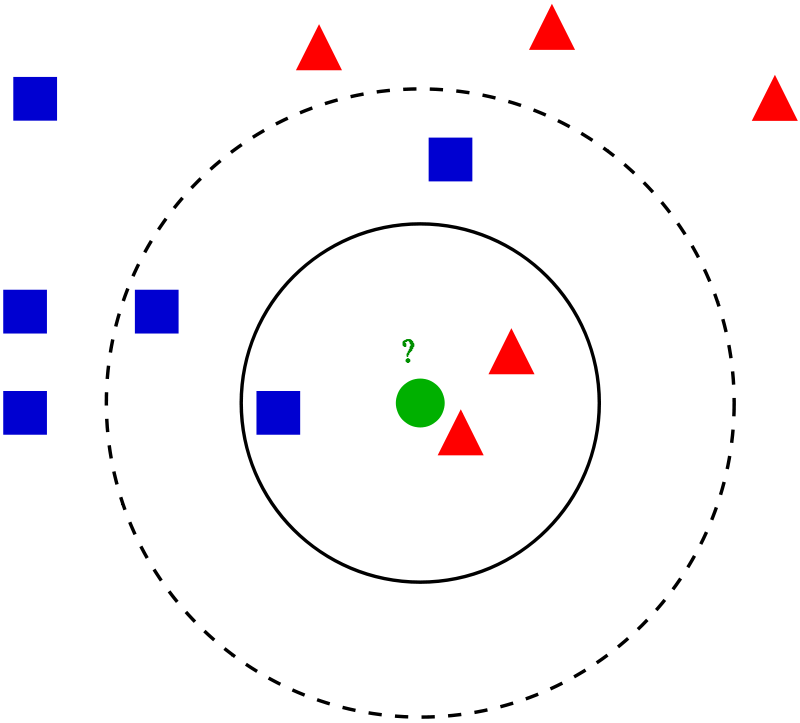


Ante una muestra nueva, ¿Cómo se puede saber a qué grupo pertenece? Bueno, naturalmente, se mirarían los puntos circundantes. Pero el resultado dependería mucho de la distancia a la que se mire. 

- Si miramos a los 3 más cercanos (círculo sólido), el punto verde pertenecería a los triángulos rojos. 

- Pero si miramos más lejos, (el círculo discontinuo) el punto se clasificaría como un cuadrado azul.


KNN funciona de la misma manera. Según el valor de k, el algoritmo clasifica las nuevas muestras por el voto mayoritario de los k vecinos más cercanos en la clasificación. Para la regresión, que predice el valor numérico real de una nueva muestra, el algoritmo toma la media de los k vecinos más cercanos. "
KNNImputer es una versión ligeramente modificada del algoritmo en la que trata de predecir el valor numérico nulo promediando las distancias entre sus k vecinos más cercanos.


Basicamente lo que hace este método es :

- Medir la distancai entre cada punto y las N-muestras más cercanas (especificado como el parémtro `n_neighbours`)


- Basándose en su(s) vecino(s) más cercano(s), tomará el valor medio de los N vecinos no nulos más cercanos al valor que falta.


Para poder usar este método tendremos que importar el KNNImputer. 

```python
from sklearn.impute import KNNImputer
```

In [37]:
numericas.isnull().sum()

age          0
bmi         13
children     0
charges      3
dtype: int64

In [38]:
# inciamos el KNNImputer y lo aplicamos a nuestras variables numéricas

imputerKNN = KNNImputer(n_neighbors=5)
imputerKNN.fit(numericas)

KNNImputer()

In [39]:
# aplicamos el método a nuestras variables y lo almacenamos en una variable
# ⚠️ Igual que en el IterativeImputer nos devuelve un array

numericas_knn= imputerKNN.transform(numericas)

In [40]:
# convertimos el array a un dataframe

df_knn_imputer = pd.DataFrame(numericas_knn, columns = numericas.columns)

In [41]:
df_knn_imputer.head()

,age,bmi,children,charges
0,19.000000,27.900,0.0,16884.92400
1,18.000000,33.770,1.0,1725.55230
2,28.000000,33.000,3.0,4449.46200
3,33.000000,22.705,0.0,21984.47061
4,39.171927,28.880,0.0,3866.85520


El siguiente paso reemplazar estos valores en el dataframe. Lo podemos hacer de la misma forma que hicimos en el apartado anterior. 

In [42]:
# lo primero que hacemos es sacar el nombre de las columnas del dataframe sin nulos

columnas_knn = df_knn_imputer.columns

In [43]:
columnas_knn

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [44]:
# utilizando "columnas" eliminamos esas columnas de nuestro dataframe

df2.drop(df_knn_imputer, axis = 1, inplace = True)

In [45]:
df2

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,NaN,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,NaN,no,northwest
1334,NaN,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [46]:
df2.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,NaN,no,southeast
3,male,no,northwest
4,male,no,northwest


In [47]:
# creamos nuevas columnas en nuestro dataframe original basándonos en el dataframe de las numericas_trans

df2[columnas_knn] = df_knn_imputer[columnas_knn]

In [48]:
# chequeamos los nulos. Perfecto! Ya no tenemos ninguno. 

df2.isnull().sum()

sex         134
smoker       27
region        0
age           0
bmi           0
children      0
charges       0
dtype: int64